In [30]:
import numpy as np   # Provides most math operations 
from matplotlib import pyplot as plt     # Provides most plotting
import seaborn as sns                    # Extra plotting
from skimage import data, io, filters, morphology, segmentation, measure

from os import listdir    # folder commands
from os.path import isfile, join  # file commands
import tifffile as tiff         # Loads tiff files as numpy arrays

import time

plt.style.use(['default'])   # Sets image format

In [2]:
plt.style.use(['default'])
tiff_dir = "./"  ## This is the folder with the images
tiff_files=[f for f in listdir(tiff_dir) if isfile(join(tiff_dir, f)) & (f[-4:]=="tiff")]   # This makes a list of all the "tiff" files in the folder
print("TIFF files: ",tiff_files)

TIFF files:  ['IMG_20200618_093816.tiff', 'IMG_20200618_093819.tiff', 'IMG_20200618_093820.tiff', 'IMG_20200618_093823.tiff', 'IMG_20200618_093824.tiff', 'IMG_20200618_093825.tiff', 'IMG_20200618_093827.tiff', 'IMG_20200618_093828.tiff', 'IMG_20200618_093829.tiff', 'IMG_20200618_093830.tiff', 'IMG_20200618_093831.tiff', 'IMG_20200618_093833.tiff', 'IMG_20200618_093834.tiff', 'IMG_20200618_093835.tiff', 'IMG_20200618_093836.tiff', 'IMG_20200618_093837.tiff', 'IMG_20200618_093844.tiff', 'IMG_20200618_093845.tiff', 'IMG_20200618_093848.tiff', 'IMG_20200618_093848_1.tiff', 'IMG_20200618_093849.tiff', 'IMG_20200618_093851.tiff', 'IMG_20200618_093852.tiff', 'IMG_20200618_093854.tiff', 'IMG_20200618_093855.tiff', 'IMG_20200618_093856.tiff', 'IMG_20200618_093857.tiff', 'IMG_20200618_093859.tiff', 'IMG_20200618_093902.tiff', 'IMG_20200618_093905.tiff', 'IMG_20200618_093906.tiff', 'IMG_20200618_093907.tiff', 'IMG_20200618_093909.tiff', 'IMG_20200618_093916.tiff', 'IMG_20200618_093917.tiff', 'IMG

In [15]:
tiff_name = join(tiff_dir, tiff_files[63])  ## Here is where you specify the file
I = tiff.imread(tiff_name)  # This loads the image file into memory

In [24]:
def generateBinaryImg(I):
    I_intensity = (I[:,:,1] > 1000) # identify pixels with low GREEN values - they are less reliable
    I_cr = I[:,:,0]/I[:,:,1]  # This is the ratio of Red (0) to Green (1)
    I_cr[~I_intensity] = 1000    # small green values would have infinite or near infinite ratios, replace with a "big" number instead for visualization
    I_sig = (I[:,:,0] > 1.0*I[:,:,1]) & I_intensity # Create image identifying flames on brightness & color basis
    I_sig3 = morphology.opening(I_sig, morphology.disk(4))
    return I_sig3;
def generateUnfilteredBinaryImg(I):
    I_intensity = (I[:,:,1] > 1000) # identify pixels with low GREEN values - they are less reliable
    I_cr = I[:,:,0]/I[:,:,1]  # This is the ratio of Red (0) to Green (1)
    I_cr[~I_intensity] = 1000    # small green values would have infinite or near infinite ratios, replace with a "big" number instead for visualization
    I_sig = (I[:,:,0] > 1.0*I[:,:,1]) & I_intensity # Create image identifying flames on brightness & color basis
    return I_sig;

In [6]:
morphology.disk(3)

array([[0, 0, 0, 1, 0, 0, 0],
       [0, 1, 1, 1, 1, 1, 0],
       [0, 1, 1, 1, 1, 1, 0],
       [1, 1, 1, 1, 1, 1, 1],
       [0, 1, 1, 1, 1, 1, 0],
       [0, 1, 1, 1, 1, 1, 0],
       [0, 0, 0, 1, 0, 0, 0]], dtype=uint8)

C:\Users\kaitl\anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\kaitl\anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


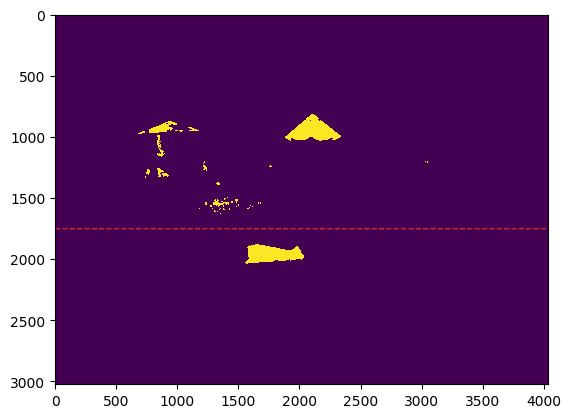

In [23]:
fig, ax = plt.subplots()

ax.imshow(generateBinaryImg(tiff.imread(join(tiff_dir, tiff_files[50]))))
ax.plot(range(0,4031), [1750]*4031, '--', linewidth=1, color='#d62728')


C:\Users\kaitl\anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in true_divide
  import sys
C:\Users\kaitl\anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys


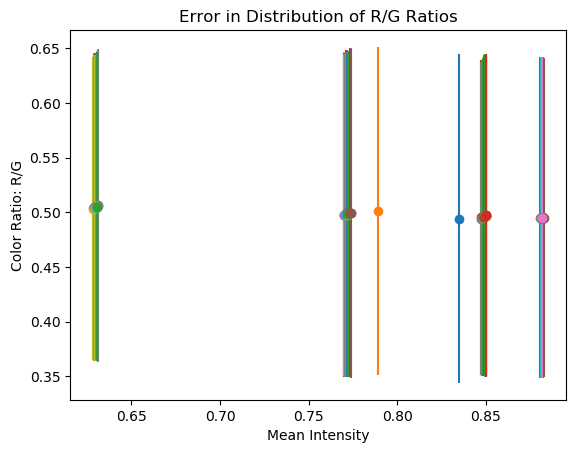

In [8]:
fig, ax= plt.subplots() 
image_Num= 0
for x in tiff_files:
    tiff_name = join(tiff_dir, tiff_files[image_Num])
    I = tiff.imread(tiff_name)
    I_intensity = (I[:,:,1] > 1000) # identify pixels with low GREEN values - they are less reliable
    I_cr = I[:,:,0]/I[:,:,1]  # This is the ratio of Red (0) to Green (1)
    I_cr[~I_intensity] = 1000    # small green values would have infinite or near infinite ratios, replace with a "big" number instead for visualization
    mean = np.mean(I_cr[I_intensity])
    plt.errorbar(np.mean(I_intensity), mean, np.std(I_cr[I_intensity]), linestyle='None', marker='o')
    image_Num+=1

#plt.errorbar(imageNum, mean, np.std(I_cr[I_intensity]), linestyle='None', marker='o')
ax.set_ylabel("Color Ratio: R/G")
ax.set_xlabel("Mean Intensity")
ax.set_title("Error in Distribution of R/G Ratios")
plt.show()

In [10]:
# fig, ax = plt.subplots(ncols = 2)
height = 4032
width = 3024
def averageIntensities(im1,im2):
    I_1 = tiff.imread(join(tiff_dir, tiff_files[im1]))  # This loads the image file into memory
    I_2 = tiff.imread(join(tiff_dir, tiff_files[im2]))  # This loads the image file into memory
    I_crop1 = I_1[width-200:width, height-200:height]
    I_crop2 = I_2[width-200:width, height-200:height]
    mean_1 = np.mean(I_crop1)
    mean_2 = np.mean(I_crop2)
#     print(mean_1)
#     print(mean_2)
    average = 0.5*(mean_1+mean_2)
#     print(average)
    if average > 10000:
        average = 10000
    elif average <1000:
        average = 1000
    I_1 = (average/mean_1)*I_1
    I_2 = (average/mean_2)*I_2
    return I_1,I_2
# images = averageIntensities(25,26)   
# I_1, I_2 = images[0], images[1]
# I_orig1, I_orig2 = I_1, I_2
# [ax[j].get_yaxis().set_visible(False) for j in range(2)]
# [ax[j].get_xaxis().set_visible(False) for j in range(2)]
# ax[0].imshow(I_1/256**2)
# ax[1].imshow(I_2/256**2)

In [11]:
def isSaturated(image):
    I = tiff.imread(join(tiff_dir, tiff_files[image]))
    I_crop = I[width-200:width, height-200:height]
    return np.mean(I_crop) > 15000        

TypeError: generateSubtractedImg() takes 2 positional arguments but 4 were given

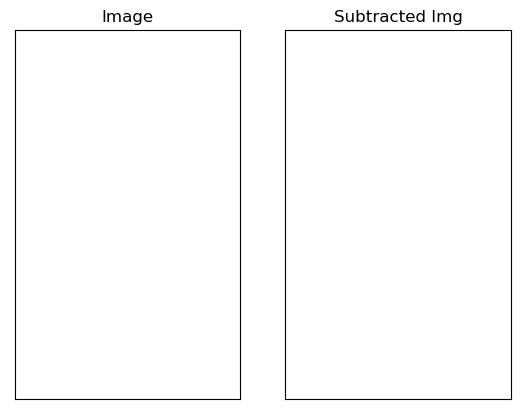

C:\Users\kaitl\anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\kaitl\anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


IMG_20200618_093816.tiff index: 0 # pixels: 18043
IMG_20200618_093819.tiff index: 1 # pixels: 1020
IMG_20200618_093820.tiff index: 2 # pixels: 150
IMG_20200618_093823.tiff index: 3 # pixels: 2
IMG_20200618_093824.tiff index: 4 # pixels: 41
IMG_20200618_093829.tiff index: 8 # pixels: 9
IMG_20200618_093834.tiff index: 12 # pixels: 4
IMG_20200618_093835.tiff index: 13 # pixels: 266
IMG_20200618_093836.tiff index: 14 # pixels: 94
IMG_20200618_093837.tiff index: 15 # pixels: 5700
IMG_20200618_093844.tiff index: 16 # pixels: 2400
IMG_20200618_093845.tiff index: 17 # pixels: 154
IMG_20200618_093848_1.tiff index: 19 # pixels: 2
IMG_20200618_093849.tiff index: 20 # pixels: 528
IMG_20200618_093852.tiff index: 22 # pixels: 4
IMG_20200618_093859.tiff index: 27 # pixels: 5
IMG_20200618_093907.tiff index: 31 # pixels: 3
IMG_20200618_093909.tiff index: 32 # pixels: 2605
IMG_20200618_093916.tiff index: 33 # pixels: 706
IMG_20200618_093917.tiff index: 34 # pixels: 11
IMG_20200618_093919.tiff index: 35 

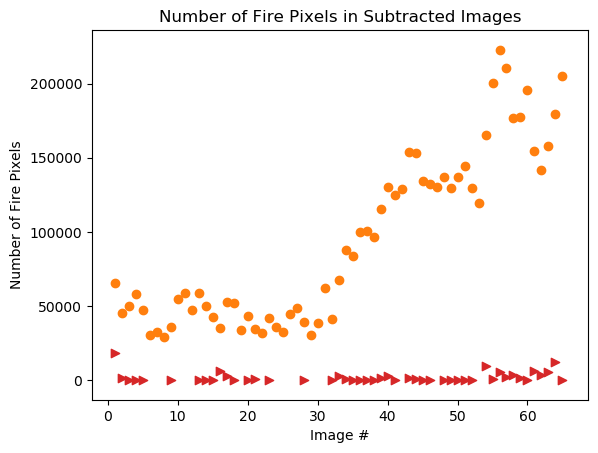

In [25]:
fig, ax = plt.subplots()
for i in range(0,len(tiff_files)-2):
    I_sub = generateSubtractedImg(i,i+1)
    I_crop1 = I_sub[0:1750, :]
    I_crop2 = I_sub[1751:width-1, :]
    fire_pixels = np.count_nonzero(I_crop1)
    false_pos_pixels = np.count_nonzero(I_crop2)
    marker_style = 'o'
    color = '#ff7f0e'
    if fire_pixels == 0:
        color = '#1f77b4'
    else 
        total_true_pos += 1
    if isSaturated(i) or isSaturated(i+1):
        marker_style = 'x'
        color = '#7f7f7f'
    plt.scatter(i+1, fire_pixels, marker = marker_style, c = color)
    if false_pos_pixels > 0:
        color = '#d62728'
        print(tiff_files[i]+ " index: "+str(i)+ " # pixels: "+ str(false_pos_pixels))
        plt.scatter(i+1, false_pos_pixels, marker = '>', c = color)
        total_false_pos+=1
    else:
        color = '#7f7f7f'
#     plt.scatter(i+1, false_pos_pixels, marker = '>', c = color)
    
ax.set_ylabel("Number of Fire Pixels")
ax.set_xlabel("Image #")
ax.set_title("Number of Fire Pixels in Subtracted Images")
plt.show()

In [54]:

def generateSubtractedImg(im1,im2, size, selem):
    images = averageIntensities(im1,im2)   
    I_1, I_2 = images[0], images[1]
    I = np.abs(np.subtract(I_1,I_2))
    I = np.where(I>1200,I,0)
    return generateBinaryImg(I, size, selem)
def generateBinaryImg(I, size, selem):
    I_intensity = (I[:,:,1] > 1000) # identify pixels with low GREEN values - they are less reliable
    I_cr = I[:,:,0]/I[:,:,1]  # This is the ratio of Red (0) to Green (1)
    I_cr[~I_intensity] = 1000    # small green values would have infinite or near infinite ratios, replace with a "big" number instead for visualization
    I_sig = (I[:,:,0] > 1.0*I[:,:,1]) & I_intensity # Create image identifying flames on brightness & color basis
    if selem == "disk":
        I_sig3 = morphology.opening(I_sig, morphology.disk(size))
    elif selem == "diamond":
#         I_sig3 = morphology.opening(I_sig, morphology.diamond(size))
        array = np.zeros((2*size+1,2*size+1), "uint8")
        array[size+1,:] =  1
        array[:,size+1] =  1
        I_sig3 = morphology.opening(I_sig, array)
    return I_sig3

C:\Users\kaitl\anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in true_divide
  if __name__ == '__main__':
C:\Users\kaitl\anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':


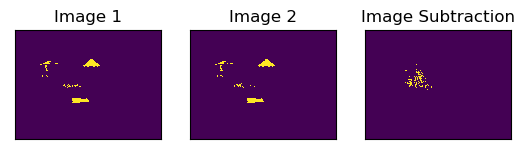

In [67]:
fig, ax = plt.subplots(ncols = 3)
image1 = 55
image2 = image1+1
tiff_name1 = join(tiff_dir, tiff_files[image1])  ## Here is where you specify the file
I_orig1 = tiff.imread(tiff_name1)  # This loads the image file into memory
tiff_name2 = join(tiff_dir, tiff_files[image2])  ## Here is where you specify the file
I_orig2 = tiff.imread(tiff_name2)  # This loads the image file into memory


[ax[j].get_yaxis().set_visible(False) for j in range(3)]
[ax[j].get_xaxis().set_visible(False) for j in range(3)]
ax[0].set_title("Image 1")
ax[1].set_title("Image 2")
ax[2].set_title("Image Subtraction")
# ax[2].set_title("Sub Img")
# ax[0].imshow(I_orig1/256**2)
# ax[1].imshow(I_orig2/256**2)
bin_img = generateSubtractedImg(image1, image2, 4, "disk")
ax[2].imshow(bin_img)
# ax.plot(range(0,4031), [1750]*4031, '--', linewidth=1, color='#d62728')
ax[0].imshow(generateBinaryImg(tiff.imread(join(tiff_dir, tiff_files[image1])), 4, "disk"))
ax[1].imshow(generateBinaryImg(tiff.imread(join(tiff_dir, tiff_files[image2])), 4, "disk"))

C:\Users\kaitl\anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in true_divide
  if __name__ == '__main__':
C:\Users\kaitl\anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':


TPR Disk: 1.0 Size: 2
FPR Disk: 0.21212121212121213 Size: 2
Avg Time (Disk): 2.6335851303030555 sec
TPR Disk: 1.0 Size: 3
FPR Disk: 0.10606060606060606 Size: 3
Avg Time (Disk): 3.4343070984848025 sec
TPR Disk: 1.0 Size: 4
FPR Disk: 0.045454545454545456 Size: 4
Avg Time (Disk): 4.459923865151447 sec
TPR Diamond: 1.0 Size: 2
FPR Diamond: 0.21212121212121213 Size: 2
Avg Time (Diamond): 1.6414935757577152 sec
TPR Diamond: 1.0 Size: 3
FPR Diamond: 0.15151515151515152 Size: 3
Avg Time (Diamond): 1.7787344515150338 sec
TPR Diamond: 1.0 Size: 4
FPR Diamond: 0.06060606060606061 Size: 4
Avg Time (Diamond): 2.078671536363827 sec


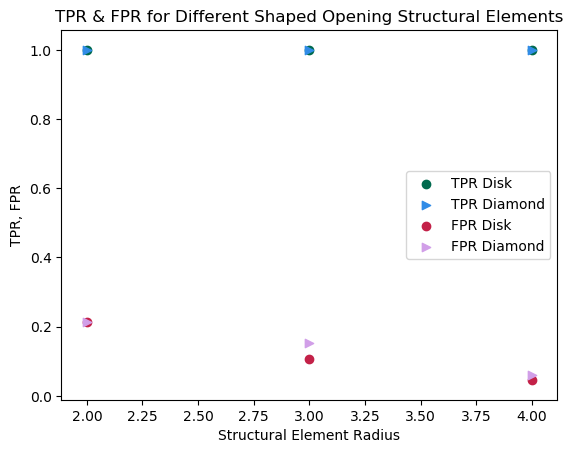

In [44]:
fig, ax = plt.subplots()
shapes = ["disk", "diamond"]
for selem in shapes:
    for size in range(2,5):
        total_false_pos, total_true_pos = 0, 0
        tic = time.perf_counter()
        for i in range(0,len(tiff_files)-1):
            I_sub = generateSubtractedImg(i,i+1, size, selem)
            fire_pixels = np.count_nonzero(I_sub[0:1750, :])
            false_pos_pixels = np.count_nonzero(I_sub[1751:width-1, :])
            if fire_pixels > 0:
                total_true_pos += 1
            if false_pos_pixels > 0:
#                 print(tiff_files[i]+ " index: "+str(i)+ " # pixels: "+ str(false_pos_pixels))
                total_false_pos+=1
        toc = time.perf_counter()
        if selem == "disk":
            tp_disk = ax.scatter(size, total_true_pos/(len(tiff_files)-1), marker = 'o', c = "#006a4e")
            print("TPR Disk: " + str(total_true_pos/(len(tiff_files)-1)) + " Size: " + str(size))
            fp_disk = ax.scatter(size, total_false_pos/(len(tiff_files)-1), marker = 'o', c = '#c32148')
            print("FPR Disk: " + str(total_false_pos/(len(tiff_files)-1))+ " Size: " + str(size))
            print("Avg Time (Disk): "+ str((toc-tic)/(len(tiff_files)-1))+ " sec")
        elif selem == "diamond":
            tp_diamond = ax.scatter(size, total_true_pos/(len(tiff_files)-1), marker = '>', c = "#318ce7")
            print("TPR Diamond: " + str(total_true_pos/(len(tiff_files)-1))+ " Size: " + str(size))
            fp_diamond = ax.scatter(size, total_false_pos/(len(tiff_files)-1), marker = '>', c = '#d19fe8')
            print("FPR Diamond: " + str(total_false_pos/(len(tiff_files)-1))+ " Size: " + str(size))
            print("Avg Time (Diamond): "+ str((toc-tic)/(len(tiff_files)-1))+ " sec")
        
    
ax.set_ylabel("TPR, FPR")
ax.set_xlabel("Structural Element Radius")
ax.set_title("TPR & FPR for Different Shaped Opening Structural Elements")
plt.legend([tp_disk, tp_diamond, fp_disk, fp_diamond], ["TPR Disk", "TPR Diamond", "FPR Disk", "FPR Diamond"])
plt.show()
